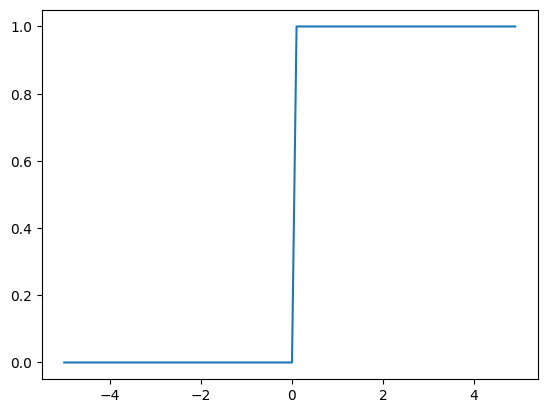

In [ ]:
import numpy as np

def step_function(x):
    return np.array(x > 0, dtype=np.int32)

import matplotlib.pyplot as plt
X = np.arange(-5,5,0.1)
Y = step_function(X)
plt.plot(X,Y)
plt.show()

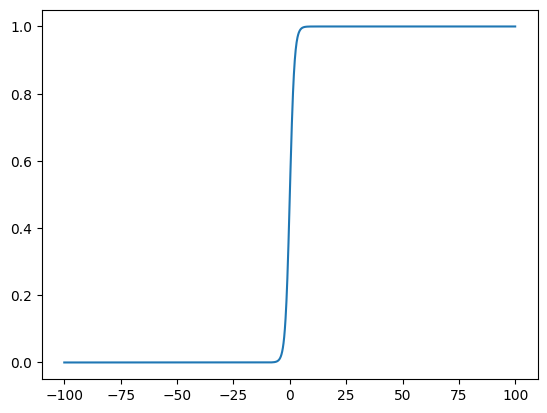

In [ ]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

X = np.arange(-100,100,0.1)
Y = sigmoid(X)
plt.plot(X,Y)
plt.show()

In [ ]:
X = np.array([[1.0, 0.5]])
W1 = np.array([[0.1, 0.3, 0.5],[0.2,0.4,0.6]])
B1 = np.array([[0.1, 0.2, 0.3]])

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

print(X.shape)
print(W1.shape)
print(B1.shape)
print(A1.shape)
print(Z1.shape)

print(Z1)

(1, 2)
(2, 3)
(1, 3)
(1, 3)
(1, 3)
[[0.57444252 0.66818777 0.75026011]]


In [ ]:
W2 = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
B2 = np.array([[0.1, 0.2]])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2)

[[0.62624937 0.7710107 ]]


In [ ]:
W3 = np.array([[0.1, 0.3],[0.2, 0.4]])
B3 = np.array([[0.1, 0.2]])

A3 = np.dot(Z2, W3) + B3

def indentity_function(x):
    return x

Z3 = indentity_function(A3)
y = Z3
print(y)

[[0.31682708 0.69627909]]


In [ ]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2,0.4,0.6]])
    network['B1'] = np.array([[0.1, 0.2, 0.3]])
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
    network['B2'] = np.array([[0.1, 0.2]])
    network['W3'] = np.array([[0.1, 0.3],[0.2, 0.4]])
    network['B3'] = np.array([[0.1, 0.2]])
    return network

def forward(network, X):
    Z1 = sigmoid(np.dot(X, network['W1']) + network['B1'])
    Z2 = sigmoid(np.dot(Z1, network['W2']) + network['B2'])
    y = indentity_function(np.dot(Z2, network['W3']) + network['B3'])
    return y


network = init_network()
X = np.array([[1.0, 0.5]])
y = forward(network, X)
print(y)

[[0.31682708 0.69627909]]


In [ ]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = %pwd
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name

    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")

def download_mnist():
    for v in key_file.values():
       _download(v)

def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")

    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")

    return data

def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])

    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNIST 데이터셋 읽기

    Parameters
    ----------
    normalize : 이미지의 픽셀 값을 0.0~1.0 사이의 값으로 정규화할지 정한다.
    one_hot_label :
        one_hot_label이 True면、레이블을 원-핫(one-hot) 배열로 돌려준다.
        one-hot 배열은 예를 들어 [0,0,1,0,0,0,0,0,0,0]처럼 한 원소만 1인 배열이다.
    flatten : 입력 이미지를 1차원 배열로 만들지를 정한다.

    Returns
    -------
    (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])


if __name__ == '__main__':
    init_mnist()


Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


'/content'